**Objective -** The main objective of this project is to build a text classifier using CNN which takes text as the input and predicts the label.

**Dataset details –** The dataset contains 20,000 (Approx) newsgroup documents from 20 different newsgroups. The dataset is of size 46 MB approximately.

* Data source - *https://archive.ics.uci.edu/dataset/113/twenty+newsgroups* <br>

* Data size (MB, GB, etc.) - 46 MB approx.<br>
* Data shape (# of rows and # columns) - It does not contain data in the form of rows and columns rather data is present in the form text files (.txt format)<br>

**Research Question –** Convolution Neural Networks are usually used for image processing. So, for this study I am going to analyze if it can also be used for processing text.

**Approach** <br>
* The data here contains in the form of text files and does not contain any tabular format data.<br>
* The text documents are first cleaned and processed using python regex which involves removing punctuations, converting non-English words to English etc.,<br>
* The cleaned text documents are then vectorized.<br>
* We use pre-trained glove vectors for vectorizing the text.<br>
* CNN architectures are built and are trained using the above vectorized documents.<br>
* Results are evaluated for the train, test datasets.

In [ ]:
import zipfile

In [ ]:
#We have dataset in the form of zip file
#Unzipping the zip file.

z = zipfile.ZipFile('20_newsgroups.zip')
z.extractall()

In [ ]:
#extracting the class labels from the file paths to check its value counts.
import os

dir_labels = []
dir_paths  = []
for root, dirs, files in os.walk("20_newsgroups", topdown=False):
    for name in files:
        x = os.path.join(root, name)
        dir_labels.append(x.split('\\')[-2])
        dir_paths.append(x)

In [ ]:
len(dir_labels)

19997

There are 19997 documents in the dataset.

In [ ]:
import numpy as np
list(np.unique(np.array(dir_labels)))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

There are a total of 20 unique class labels as shown above.

**Exploratory Data Analysis:**

**Figure 1:**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

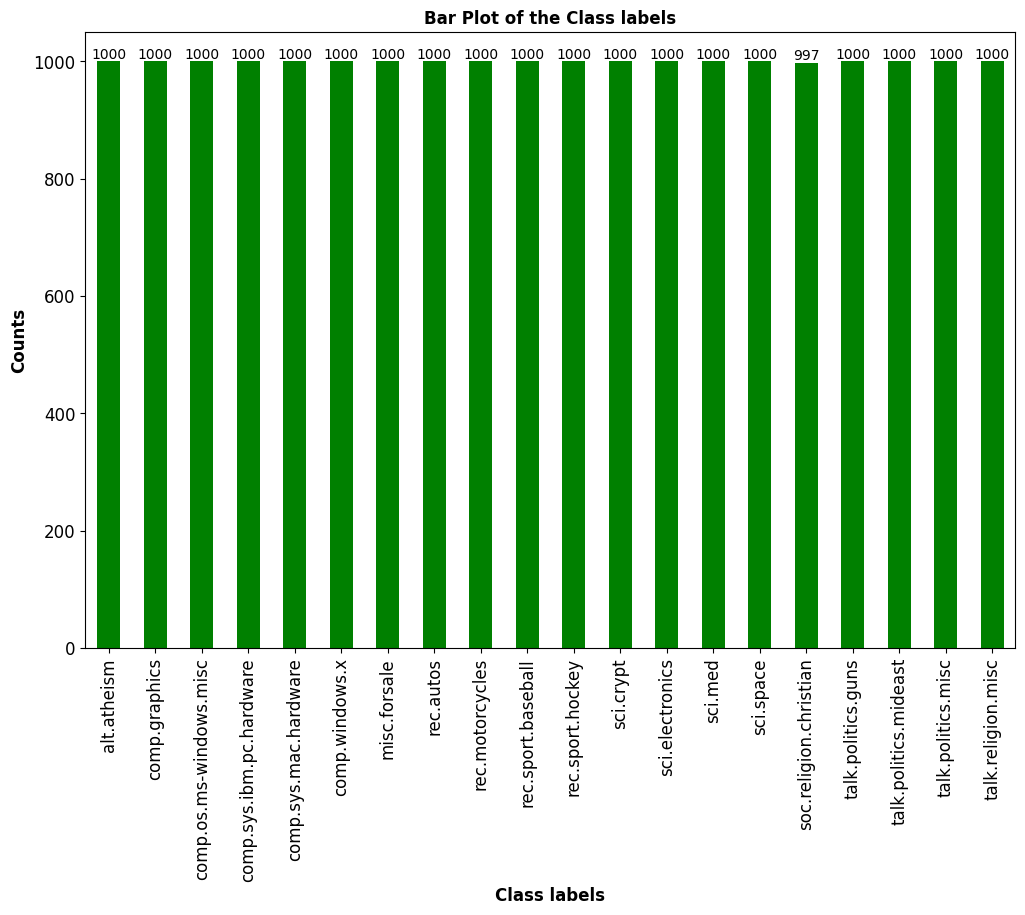

In [ ]:
#Bar chart showing the counts of each class label

plt.figure(figsize=(12, 8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = pd.Series(dir_labels).value_counts().sort_index().plot(kind='bar',color='green')

for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='edge')

plt.xticks(rotation = 90)
plt.title("Bar Plot of the Class labels",fontweight='bold')
plt.ylabel("Counts",fontsize=12,fontweight='bold')
plt.xlabel("Class labels",fontsize=12,fontweight='bold')
plt.show()

**Observations:**<br>
From the above bar chart it is clear that<br>
* All the class labels has equal number of documents except for the soc.religion.christian class label.<br>
* soc.religion.christian class label has 997 documents while all the other class labels have 1000 documents.<br>
* We can say that the dataset is almost balanced one.

**Figure 2:**

In [ ]:
# Line chart showing the file size of the documents.

file_size = []
for root, dirs, files in os.walk("20_newsgroups", topdown=False):
    for name in files:
        x = os.path.join(root, name)
        file_size.append(os.path.getsize(x))

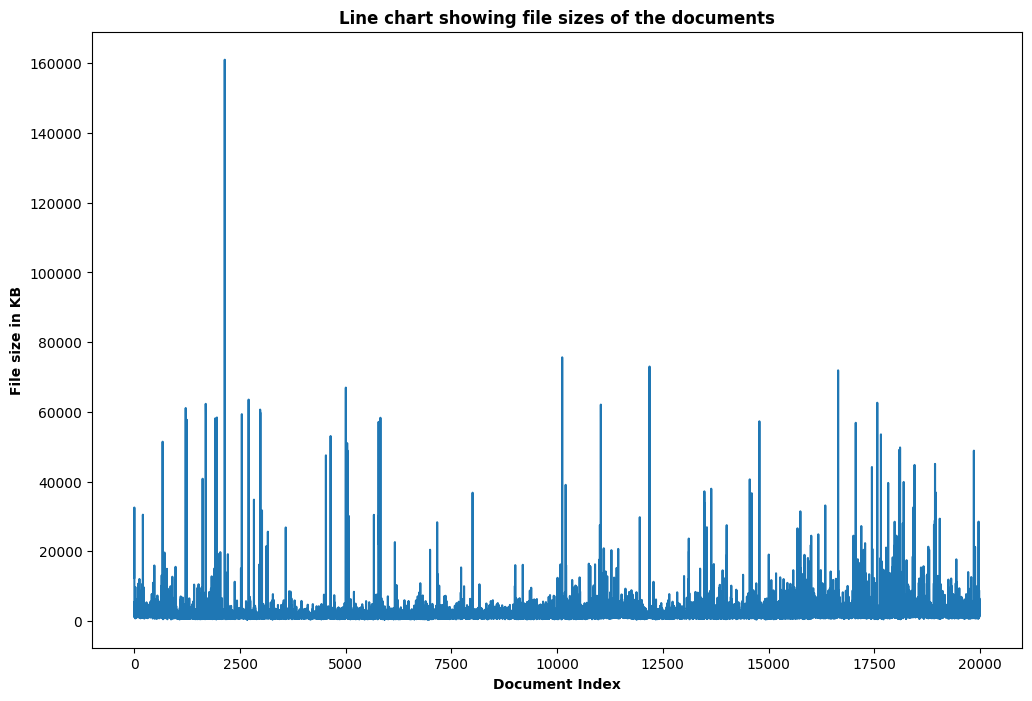

In [ ]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.title("Line chart showing file sizes of the documents",fontweight='bold')
plt.ylabel("File size in KB",fontsize=10,fontweight='bold')
plt.xlabel("Document Index",fontsize=10,fontweight='bold')
plt.plot(file_size)
plt.show()

**Observations:**<br>
From the above line chart it can be observed that the <br>
* Most of the documents have file size of less than 20000 bytes.<br>
* The maximum file size is observed to be 160000 bytes.

## Progress for Presentation - 2

#### Data Cleaning and Preparation

In [ ]:
# printing text in the random article.

print("Name of the article - ",dir_paths[1])
print('\n')
file = open(dir_paths[1])
info = file.read()
print(info)
file.close()

Name of the article -  20_newsgroups\alt.atheism\51060


Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51060 alt.atheism.moderated:727 news.answers:7300 alt.answers:155
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!agate!netsys!ibmpcug!mantis!mathew
From: mathew <mathew@mantis.co.uk>
Newsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers
Subject: Alt.Atheism FAQ: Introduction to Atheism
Summary: Please read this file before posting to alt.atheism
Keywords: FAQ, atheism
Message-ID: <19930405122245@mantis.co.uk>
Date: Mon, 5 Apr 1993 12:22:45 GMT
Expires: Thu, 6 May 1993 12:22:45 GMT
Followup-To: alt.atheism
Distribution: world
Organization: Mantis Consultants, Cambridge. UK.
Approved: news-answers-request@mit.edu
Supersedes: <19930308134439@mantis.co.uk>
Lines: 646

Archive-name: atheism/introduction
Alt-atheism-archive-name: introduction
Last-modified: 5 April 1993
Version: 1.2

-----BEGIN PGP SIGNED 

In [ ]:
def emailprocessing(input_text):
    """
    This function takes the text as the input in
    string format and processes the words with
    email extensions and returns a string which
    is concatenated with list of such words.
    """
    raw_text  = input_text.read()
    emails = re.findall(r"[\w\-\.]+@[\w\.-]+\b", raw_text)# extracts email extensions
    processed_email   = []
    for i in emails:
        i = i.split('@')[1] # split the word based on '@'
        temp = i.split('.')
        for j in temp:
            if len(j)<=2:# check for the length of the word if it is less than or equal to 2 and ignore if its true.
                continue
            elif j=='com':# check if the word is 'com' and ignore if its true.
                continue
            elif "@" in j:
                processed_email.append(j[1:])
            else:
                processed_email.append(j)
    return ' '.join(processed_email).lower()

In [ ]:
# Applying emailprocessing function for the above text in the article
# and printing its output

file = open(dir_paths[1])
print(emailprocessing(file))
file.close()

mantis mantis mit edu mantis mantis mantis


In [ ]:
def subjectprocessing(input_text):
    """
    This function takes the text as the input and
    processes the text line after the word "Subject:"
    and returns the string.
    """
    raw_text  = input_text.read()
    subject = re.findall('^Subject.*$', raw_text,re.MULTILINE) # extracts all the lines in the raw_text
                                                               # that start with Subject and return them
                                                               # as list of strings.
    processed_subject  = []
    subject = re.sub('[^A-Za-z0-9]+', ' ', subject[0]) # Replace non alpha numeric characters in the text with
                                                       # single space.
    subject = subject.rstrip().split(' ')# removes the leading and trailing spaces from the text
                                         # and splits the text into words based on space.
    for i in subject:
        if i=='Subject' or i=='Re':# checks if the word is "Subject" or "Re" and ignore if its true
            continue
        else:
            processed_subject.append(i)
    return ' '.join(processed_subject).lower()# joins the list of words into a single string and lower casing the string.

In [ ]:
# Applying subjectprocessing function for the above text in the article
# and printing its output

file = open(dir_paths[1])
print(subjectprocessing(file))
file.close()

alt atheism faq introduction to atheism


In [ ]:
def textprocessing(input_text):
    """
    This function takes the text as the input and
    processes the words with email extensions and
    returns the string which is concatenated with
    list of such words.
    """

    raw_text  = input_text.read()
    text  =  re.sub(r"[\w\-\.]+@[\w\.-]+\b",' ',raw_text) # finds all occurrences of email addresses,
                                                          # and replaces them with a single space.
    text  =  re.sub(r'^Subject.*$',' ',text,flags=re.MULTILINE) # finds all the lines in the text
                                                                # that start with Subject and replaces them with
                                                                # a single space.
    text  =  re.sub(r'Write to:.*$','', text,flags=re.MULTILINE) # replaces the Write to: lines from the text with
                                                                 # an empty string.
    text  =  re.sub(r'From:.*$','', text,flags=re.MULTILINE)     # replaces the From: lines from the text with
                                                                 # an empty string.
    #Decontractions
    text  =  re.sub("[a-zA-Z]+:",'',text) # finds all occurrences of sequences of alphabetic characters
                                          # followed by a colon, and replaces them with an empty string.
    text  =  re.sub(r"won\'t", "will not", text)  # replaces the words with won't with will not
    text  =  re.sub(r"can\'t", "can not", text)   # replaces the words with can't with can not
    text  =  re.sub(r"n\'t", " not", text)        # replaces the words with "n't" with " not"
    text  =  re.sub(r"\'re", " are", text)        # replaces the words with "'re" with " are"
    text  =  re.sub(r"\'s", " is", text)          # replaces the words with "'s" with " is"
    text  =  re.sub(r"\'d", " would", text)       # replaces the words with "'d" with " would"
    text  =  re.sub(r"\'ll", " will", text)       # replaces the words with "'ll" with " will"
    text  =  re.sub(r"\'t", " not", text)         # replaces the words with "'t" with " not"
    text  =  re.sub(r"\'ve", " have", text)       # replaces the words with "'ve" with " have"
    text  =  re.sub(r"\'m", " am", text)          # replaces the words with "'m" with " am"
    text  =  text.strip()                         # remove the leading and trailing edges from the string
    text  =  re.sub(r'\<[^<>]*\>','', text,flags=re.MULTILINE) # removes the text within parentheses <>
                                                               # and does this for all the lines in string.
    text  =  re.sub(r"\([^()]*\)",'', text,flags=re.MULTILINE) # removes the text within parentheses ()
                                                               # and does this for all the lines in string.
    text  =  re.sub(r'\[[^[]*\]','', text,flags=re.MULTILINE)  # removes the text within parentheses []
                                                               # and does this for all the lines in string.
    text  =  text.replace('>','')  # replaces the parenthesis > with an empty string.
    text  =  text.replace('\\','') # replaces the backslash with an empty string.
    text  =  text.replace('?',' ') # replaces the '?' with an empty string.
    text  =  re.sub('\n',' ', text,flags=re.MULTILINE) # replaces all the new line characters with a single space
                                                       # and does this for multiple lines in the string.
    text  =  re.sub(' +',' ',text,flags=re.MULTILINE)  # replaces all the new line characters with a single space
                                                       # and does this for multiple lines in the string.
    text  =  re.sub('-',' ', text,flags=re.MULTILINE)  # replaces multiple consecutive spaces with a single space
                                                       # and does this for multiple lines in the string.
    # Spacy is a natural processing language library in Python which provides various pre-trained models for
    # various languages including english.
    NER = spacy.load("en_core_web_sm") # loads the english language model.
    text1= NER(text) # text is tokenized and further linguistic analyses are performed on these tokens
    a = []
    for i in text1.ents: # loops through the named entities (e.g., names of people, organizations, locations etc.)
                         # from the tokens.
        a.append((i.text,i.label_)) # appends the text of recognized named entity and its label.
    for i in a:
        if i[1]=='PERSON': # checks if the label of the named entity is a person entity
            text = text.replace(i[0],'') # replace person entities in the text with an empty string.
        elif i[1]=='GPE': # checks if the label of the named entity is geopolitical entity
            if " " in i[0]:
                temp = i[0].replace(' ','_')
                text = text.replace(i[0],temp) # if the word is a geopolitical entity, replace space in the word
                                               # with an underscore to consider it as single word.
    text = re.sub('\d',' ',text) #replaces digits(0-9) with a single space
    text = re.sub(r'\b_+|_+\b', '', text) # finds the underscores that appear at the beginning of the word
                                          # or at the end or have one or more consecutive underscores in a word
                                          # and replaces with an empty string.
    text = re.sub(r"\b[a-zA-Z]{1}_([a-zA-Z]+)",r"\1",text) #  It searches for patterns where there's
                                                           #  a single letter (a-zA-Z) followed by an underscore,
                                                           #  followed by one or more letters (a-zA-Z) and
                                                           # it replaces it with the part of the pattern that matches
                                                           # the one or more letters after the underscore.
    text = re.sub(r"\b[a-zA-Z]{2}_([a-zA-Z]+)",r"\1",text) # It searches for patterns where there are exactly
                                                           # two alphabetic characters (a-zA-Z) followed by an
                                                           # underscore, and then one or more letters (a-zA-Z) and
                                                           # it replaces it with the part of the pattern that matches
                                                           # the one or more letters after the underscore.
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b',' ',text) # It searches for words (sequences of alphanumeric characters)
                                           # that consist of one or two characters and replaces them with a space.
    text = re.sub(r'\b\w{15,}\b',' ',text) # It searches for words (sequences of alphanumeric characters)
                                           # that consist of 15 or more characters and replaces them with a space.
    text = re.sub(r'[^a-zA-Z_]',' ',text)  # It searches for characters that are not letters
                                           # (both uppercase and lowercase) or underscores and replaces
                                           # them with space characters.
    text = re.sub(r' {2,}',' ',text)       # It searches for two or more consecutive space characters
                                           # and replaces them with a single space.
    return text

In [ ]:
# Applying textprocessing function for the above text in the article
# and printing its output

file = open(dir_paths[1])
print(textprocessing(file))
file.close()

cantaloupe srv cmu edu alt alt atheism news alt cantaloupe srv cmu edu crabapple srv cmu edu ece cmu edu europa eng gtefsd com howland reston ans net agate netsys ibmpcug mantis mathew alt atheism alt atheism moderated news answers alt answers please read this file before posting alt atheism faq atheism message mon apr gmt thu may gmt followup alt atheism world mantis consultants cambridge archive atheism introduction alt atheism archive introduction last april begin pgp signed message introduction atheism mathew this article attempts provide general introduction atheism whilst have tried neutral possible regarding contentious issues you should always remember that this document represents only one viewpoint would encourage you read widely and draw your own conclusions some relevant books are listed companion article provide sense cohesion and progression have presented this article imaginary conversation between atheist and theist all the questions asked the imaginary theist are quest

In [ ]:
# Spacy is a natural processing language library in Python which provides various pre-trained models for
# various languages.
# Installing Spacy
!pip install spacy

In [ ]:
# Installing english language for spacy

!python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 4.9 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
from tqdm import tqdm
import spacy
import re

In [ ]:
email = []
for i in tqdm(dir_paths): # looping through all the files and
                          # applying email processing function and
                          # appending the output of the funtion to the
                          # email list.
    sample = open(i)
    email.append(emailprocessing(sample))
    sample.close()

100%|██████████████████████████████████████████████████████████████████████████| 19997/19997 [00:06<00:00, 3230.55it/s]


In [ ]:
subject = []
for i in tqdm(dir_paths): # looping through all the files and
                          # applying subject processing function and
                          # appending the output of the funtion to the
                          # subject list.
    sample = open(i)
    subject.append(subjectprocessing(sample))
    sample.close()

100%|██████████████████████████████████████████████████████████████████████████| 19997/19997 [00:03<00:00, 6125.42it/s]


In [ ]:
text = []
for i in tqdm(dir_paths): # looping through all the files and
                          # applying text processing function and
                          # appending the output of the funtion to the
                          # text list.
    sample = open(i)
    text.append(textprocessing(sample))
    sample.close()

100%|██████████████████████████████████████████████████████████████████████████| 19997/19997 [3:52:02<00:00,  1.44it/s]


In [ ]:
#creating a dataframe out of email, subject, text and dir_labels lists

data = pd.DataFrame(list(zip(email,subject,text,dir_labels)),columns = ['email', 'subject','text','target_label'])
data.to_pickle("processed_data.pkl") # storing the dataframe in a pickle file.

In [2]:
unpickled_df = pd.read_pickle('processed_data.pkl')
unpickled_df.head()

,email,subject,text,target_label
0,mantis mantis mit edu mantis netcom mantis,alt atheism faq atheist resources,cantaloupe srv cmu edu alt alt atheism news al...,alt.atheism
1,mantis mantis mit edu mantis mantis mantis,alt atheism faq introduction to atheism,cantaloupe srv cmu edu alt alt atheism news al...,alt.atheism
2,dbstu1 tu-bs dbstu1 tu-bs ibr tu-bs dbstu1 tu-...,gospel dating,alt atheism cantaloupe srv cmu edu crabapple s...,alt.atheism
3,mantis mantis kepler unh edu kepler unh edu,university violating separation of church state,cantaloupe srv cmu edu alt alt politics usa ca...,alt.atheism
4,watson ibm com watson ibm austin ibm cbnewsl a...,soc motss et al princeton axes matching funds ...,cantaloupe srv cmu edu alt soc rec alt atheism...,alt.atheism


In [3]:
# extracting the length of the words for each row in the text
# and assigning to new column by name text_word_count.

unpickled_df['text_word_count'] = unpickled_df['text'].apply(lambda x:len(x.split(' ')))

In [4]:
# printing first 5 rows of the data.
unpickled_df.head()

,email,subject,text,target_label,text_word_count
0,mantis mantis mit edu mantis netcom mantis,alt atheism faq atheist resources,cantaloupe srv cmu edu alt alt atheism news al...,alt.atheism,1224
1,mantis mantis mit edu mantis mantis mantis,alt atheism faq introduction to atheism,cantaloupe srv cmu edu alt alt atheism news al...,alt.atheism,4023
2,dbstu1 tu-bs dbstu1 tu-bs ibr tu-bs dbstu1 tu-...,gospel dating,alt atheism cantaloupe srv cmu edu crabapple s...,alt.atheism,518
3,mantis mantis kepler unh edu kepler unh edu,university violating separation of church state,cantaloupe srv cmu edu alt alt politics usa ca...,alt.atheism,189
4,watson ibm com watson ibm austin ibm cbnewsl a...,soc motss et al princeton axes matching funds ...,cantaloupe srv cmu edu alt soc rec alt atheism...,alt.atheism,107


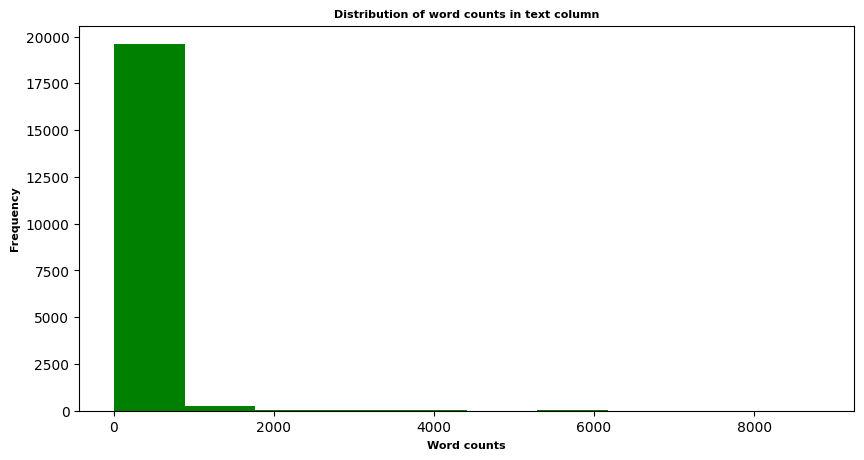

In [5]:
plt.figure(figsize=(10,5))
unpickled_df['text_word_count'].plot.hist(color='green')

plt.title("Distribution of word counts in text column",fontsize=8,fontweight='bold')
plt.xlabel("Word counts",fontsize=8,fontweight='bold')
plt.ylabel("Frequency",fontsize=8,fontweight='bold')
plt.show()

**Observation:**<br>
From the above chart, it can be observed that the most of the word counts in the text column are less than 1000.

#### Displaying Wordclouds for subject and text columns

In [6]:
!pip install Wordcloud

In [7]:
from wordcloud import WordCloud

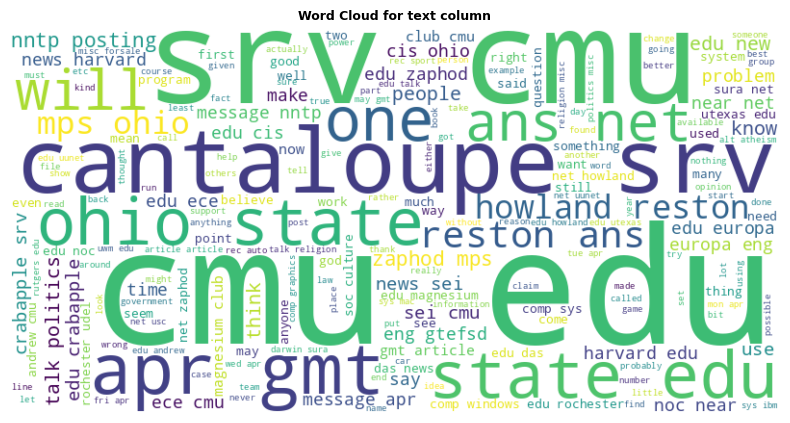

In [8]:
#Word Cloud for text column

wordcloud = WordCloud(width=800, height=400, background_color="white").\
            generate(" ".join(unpickled_df['text'].tolist()))
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud for text column",fontsize=9,fontweight='bold')
plt.axis("off")
plt.show()

**Observations:**<br>
It can be observed that the Ohio state is highly used word in the news article. News articles must have covered most of its news from Ohio state.

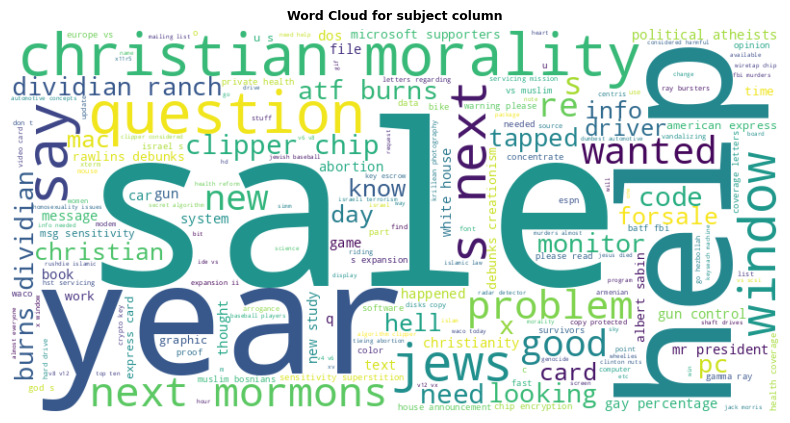

In [9]:
# word cloud for subject column

wordcloud = WordCloud(width=800, height=400, background_color="white").\
            generate(" ".join(unpickled_df['subject'].tolist()))
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud for subject column",fontsize=9,fontweight='bold')
plt.axis("off")
plt.show()

**Observations:**<br>
It can be observed that the sale and year are highly used words in the subject of news articles.

#### Train-Test Split

In [10]:
# combining the Processed_email , Processed_subject , Processed_text columns into one column
import numpy as np

X = np.array(unpickled_df['email']+unpickled_df['subject']+unpickled_df['text'])

In [11]:
y = np.array(unpickled_df['target_label'])

In [12]:
# Splitting the data into train and test with test size of 25% of the total datasize.

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=42)
le = preprocessing.LabelEncoder() # Encoding the target labels using label encoder
le.fit(y_train)
y_train  = le.transform(y_train)
y_test   = le.transform(y_test)
y_train  = tf.keras.utils.to_categorical(y_train) # converting labels in y_train to one-hot encoded representation.
y_test   = tf.keras.utils.to_categorical(y_test)  # converting labels in y_test to one-hot encoded representation.

In [13]:
# printing the shapes of train and test datasets

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14997,)
(5000,)
(14997, 20)
(5000, 20)


In [14]:
lengths = [len(s.split()) for s in X_train] # finding length of words in each row in the train dataset.
max_length = int(np.percentile(lengths,99)) # finding the length pertaining to 99 percentile.
print(max_length)

1361


The above max length gives information that 99% of the

*   List item
*   List item

documents have less than or equal 1361 words in it.

#### Modelling

In [15]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, lower= 1,\
                      filters= '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',oov_token="<OOV>") # Tokenizes and vectorizes
                                                      # the text data excluding the underscore
                                                      # in the filters as we need this.
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences  = tokenizer.texts_to_sequences(X_test)

# The pad_sequences function pads or truncates the input sequences to have a maximum length,
# and it adds padding at the end of each sequence. The result is a set of sequences with uniform length.

train_padded = pad_sequences(train_sequences,padding="post",\
                             truncating='post',maxlen=max_length,dtype='int32')
test_padded  = pad_sequences(test_sequences,padding="post",\
                             truncating='post',maxlen=max_length,dtype='int32')

# printing the shape of train and test datasets post padding the sequences.
print(train_padded.shape)
print(test_padded.shape)

(14997, 1361)
(5000, 1361)


In [16]:
size_of_vocabulary = len(tokenizer.word_index) + 1
print(size_of_vocabulary)

94450


In [17]:
#Reference - https://www.analyticsvidhya.com/blog/2020/03/pretrained-word-embeddings-nlp/

# creating a dictionary(word:coeffs) using glove vectors text file.
embeddings_index = dict()
f = open('glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word   = values[0]
    coefs  = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded {0} word vectors'.format(len(embeddings_index)))

Loaded 400000 word vectors


In [18]:
# finding the embedding matrix for the words in the tokenizer using
# embedding index created earlier.

embedding_matrix = np.zeros((size_of_vocabulary,100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#### Architecture 1

In [19]:
from tensorflow.keras.layers import Dense,Input,Activation,Embedding,Conv1D,concatenate,\
                       MaxPooling1D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils  import plot_model

initializer = tf.keras.initializers.GlorotNormal(seed=0)
input_layer = Input(shape = (max_length,),dtype='int32')
word_embedding = Embedding(size_of_vocabulary,100,weights=[embedding_matrix],\
                           input_length=1000,trainable=True)(input_layer)
conv1    =   Conv1D(filters=32,kernel_size=4,activation='relu',padding='same',\
                    kernel_initializer=initializer)(word_embedding)
conv2    =   Conv1D(filters=32,kernel_size=6,activation='relu',padding='same',\
                    kernel_initializer=initializer)(word_embedding)
conv3    =   Conv1D(filters=32,kernel_size=8,activation='relu',padding='same',\
                    kernel_initializer=initializer)(word_embedding)
merged1  =   concatenate([conv1,conv2,conv3])
pool1    =   MaxPooling1D(pool_size=2,padding='same')(merged1)
conv4    =   Conv1D(filters=32,kernel_size=4,activation='relu',padding='same',kernel_initializer=initializer)(pool1)
conv5    =   Conv1D(filters=32,kernel_size=6,activation='relu',padding='same',kernel_initializer=initializer)(pool1)
conv6    =   Conv1D(filters=32,kernel_size=8,activation='relu',padding='same',kernel_initializer=initializer)(pool1)
merged2  =   concatenate([conv4,conv5,conv6])
pool2    =   MaxPooling1D(pool_size=2,padding='same')(merged2)
conv7    =   Conv1D(filters=32,kernel_size=4,activation='relu',padding='same',kernel_initializer=initializer)(pool2)
flat1    =   Flatten()(conv7)
drop1    =   Dropout(0.5)(flat1)
dense1   =   Dense(50,activation='relu',kernel_initializer=initializer)(drop1)
output   =   Dense(20,activation='softmax',kernel_initializer=initializer)(dense1)

model    =   Model(inputs = input_layer,outputs= output)

In [20]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer = adam ,metrics=['accuracy'])

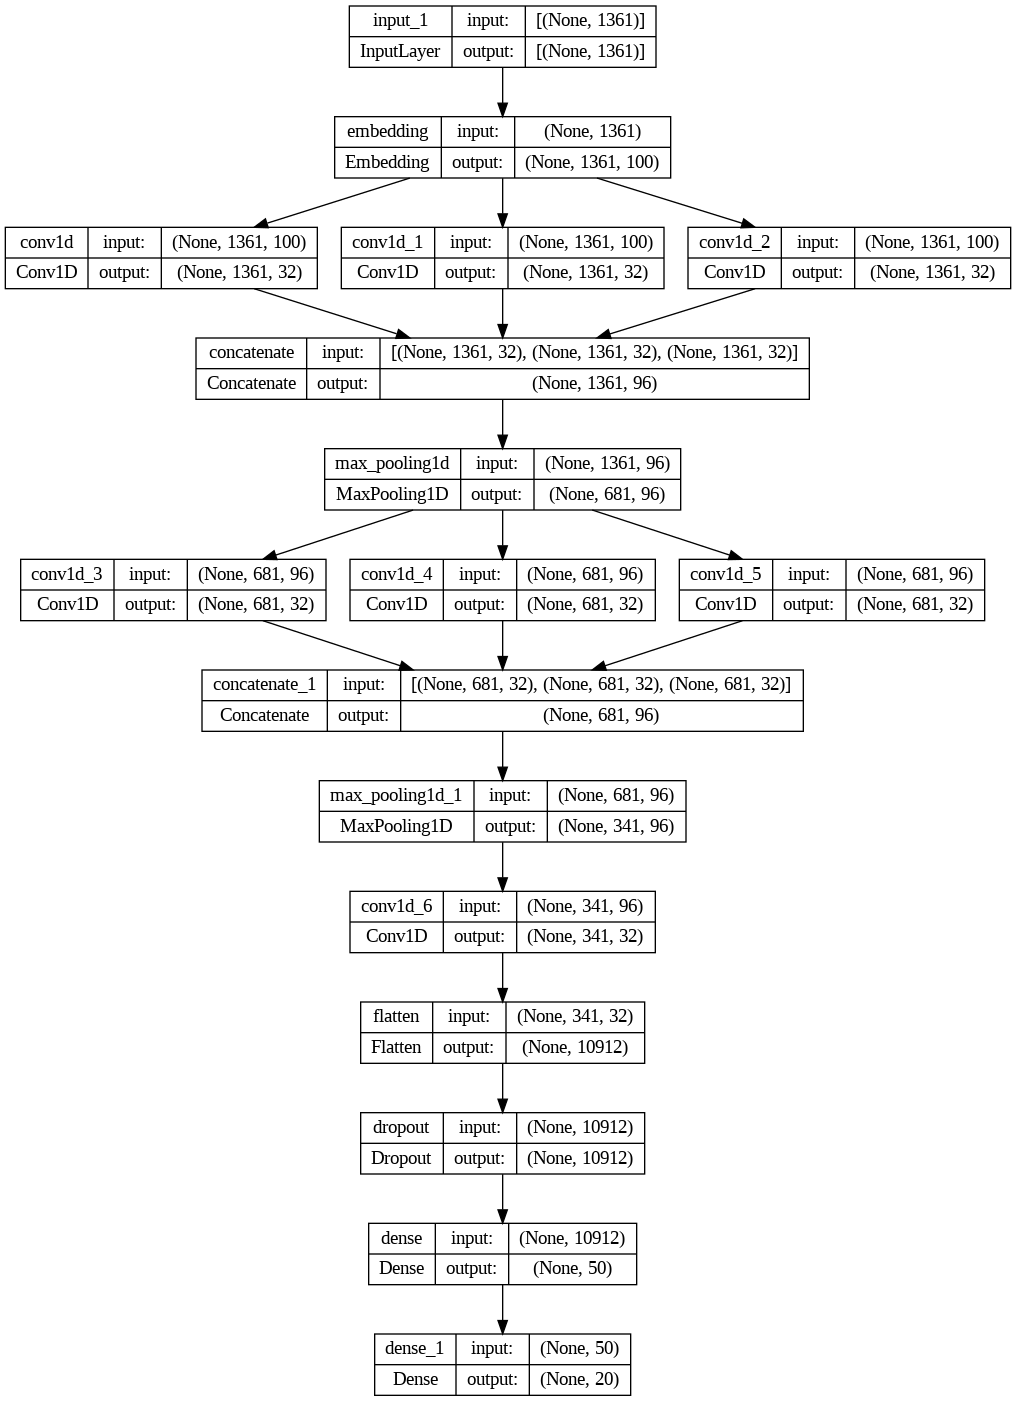

In [27]:
plot_model(model, to_file='model_1.png', show_shapes=True)

In [21]:
!pip install pydot

In [22]:
!pip install graphviz

In [23]:
!pip install pydotplus

In [24]:
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1,patience=3)
mc = ModelCheckpoint('best_model_1.h5', monitor='val_accuracy', mode='max', save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.8, patience=2,verbose=0)

callback_list = [es,mc,reduce_lr]

In [26]:
model.fit(train_padded,y_train,batch_size=80,epochs=20,verbose=2,validation_data=(test_padded,y_test),\
          callbacks = callback_list)

Epoch 1/20

Epoch 1: val_accuracy improved from 0.95040 to 0.95160, saving model to best_model_1.h5
188/188 - 420s - loss: 0.0730 - accuracy: 0.9697 - val_loss: 0.1429 - val_accuracy: 0.9516 - lr: 8.0000e-04 - 420s/epoch - 2s/step
Epoch 2/20

Epoch 2: val_accuracy did not improve from 0.95160
188/188 - 373s - loss: 0.0741 - accuracy: 0.9697 - val_loss: 0.1646 - val_accuracy: 0.9468 - lr: 8.0000e-04 - 373s/epoch - 2s/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.95160
188/188 - 397s - loss: 0.0679 - accuracy: 0.9720 - val_loss: 0.1476 - val_accuracy: 0.9428 - lr: 8.0000e-04 - 397s/epoch - 2s/step
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.95160
188/188 - 393s - loss: 0.0632 - accuracy: 0.9721 - val_loss: 0.1433 - val_accuracy: 0.9470 - lr: 6.4000e-04 - 393s/epoch - 2s/step
Epoch 4: early stopping


Train Accuracy and Test Accuracies are found to be 96.9% and 95% Respectively.


Next Steps: Testing the model with random input texts and getting the output of target varable to which NewsGroup the text belons.